# Log Transformations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

In [3]:
df = pd.read_csv('normal_data.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,-0.866665,3,-1.451035,-0.980636,5650,-0.915570,-0.0825,-0.304949,3,-0.560804,-0.735272,0.0,1955,1955.0,-0.943696,5650
1,-0.006239,3,0.174457,0.533324,7242,0.937363,-0.0825,-0.304949,3,-0.560804,0.460722,400.0,1951,1991.0,-0.432920,7639
2,-0.980717,2,-1.451035,-1.427199,10000,-0.915570,-0.0825,-0.304949,3,-1.413161,-1.230583,0.0,1933,1933.0,1.070221,8062
3,0.173414,4,1.149752,-0.131075,5000,-0.915570,-0.0825,-0.304949,5,-0.560804,-0.892322,910.0,1965,1965.0,-0.914509,5000
4,-0.082455,3,-0.150642,-0.436046,8080,-0.915570,-0.0825,-0.304949,3,0.291552,-0.131235,0.0,1987,1987.0,-0.272391,7503


In [6]:
feats = ['price', 'sqft_living', 'grade','sqft_above', 'sqft_living15', 'bathrooms', 'waterfront', 'floors','view']
corr = df[feats].corr()
corr

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,waterfront,floors,view
price,1.000000,0.701929,0.667964,0.605392,0.585267,0.525915,0.264308,0.256820,0.393502
sqft_living,0.701929,1.000000,0.762776,0.876448,0.756400,0.755755,0.104635,0.353941,0.281710
grade,0.667964,0.762776,1.000000,0.756069,0.713863,0.665834,0.082817,0.458783,0.249077
sqft_above,0.605392,0.876448,0.756069,1.000000,0.731756,0.686664,0.071776,0.523970,0.166007
sqft_living15,0.585267,0.756400,0.713863,0.731756,1.000000,0.569878,0.083822,0.280072,0.278921
bathrooms,0.525915,0.755755,0.665834,0.686664,0.569878,1.000000,0.063628,0.502574,0.186011
waterfront,0.264308,0.104635,0.082817,0.071776,0.083822,0.063628,1.000000,0.020794,0.380543
floors,0.256820,0.353941,0.458783,0.523970,0.280072,0.502574,0.020794,1.000000,0.028401
view,0.393502,0.281710,0.249077,0.166007,0.278921,0.186011,0.380543,0.028401,1.000000


# Feature Engineering/Train Test Split

In [7]:
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [8]:
train, test = train_test_split(df)

In [9]:
print(len(train), len(test))
train.head()

16197 5399


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
6371,0.706927,6,-1.451035,-0.708341,20620,0.937363,-0.0825,-0.304949,3,-0.560804,-0.433254,0.0,1954,1954.0,0.676194,10080
8344,-0.082455,4,1.474850,-0.109292,9988,-0.915570,-0.0825,-0.304949,3,0.291552,-0.541980,640.0,1980,1980.0,-0.009706,8972
1990,-0.382012,4,0.499555,1.121481,5868,0.937363,-0.0825,-0.304949,3,0.291552,1.596312,0.0,2001,2001.0,1.405874,5924
6100,0.396618,3,-0.800838,-0.261777,9990,0.937363,-0.0825,-0.304949,5,0.291552,0.062057,0.0,1961,1961.0,0.165417,12474
5277,-0.068845,5,0.499555,1.883907,15916,0.010897,-0.0825,-0.304949,5,0.291552,2.441965,0.0,1967,1967.0,0.705381,11662


In [10]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
18134,0.236020,3,-0.150642,-0.152859,3800,-0.915570,-0.0825,-0.304949,4,-0.560804,-0.892322,890.0,1927,1927.0,-0.418327,3800
17412,-0.449926,3,-0.475740,-0.893501,11224,-0.915570,-0.0825,-0.304949,5,-0.560804,-0.638626,0.0,1947,1947.0,-0.608043,11052
4078,-0.429647,3,0.499555,0.152111,20531,0.937363,-0.0825,-0.304949,3,0.291552,0.521125,0.0,1998,1998.0,0.632413,19249
6101,0.040035,4,-0.475740,0.195679,11000,-0.915570,-0.0825,-0.304949,3,0.291552,-0.203719,640.0,1976,1976.0,-0.038893,10000
8422,-0.632303,4,0.824653,0.369947,8438,0.937363,-0.0825,-0.304949,3,0.291552,0.762740,0.0,1996,1996.0,0.632413,8580


In [11]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2091.
Date:                Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:47:50   Log-Likelihood:                -14493.
No. Observations:               16197   AIC:                         2.902e+04
Df Residuals:                   16181   BIC:                         2.914e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        19.7585      0.459     43.018      0.000      18.858      20.659
bedrooms         -0.1161      0.007    -17.264      0.000      -0.129      -0.103
bathrooms         0.1079      0.009     12.557      0.000       0.091       0.125
sqft_living       0.3079      0.061      5.038      0.000       0.188       0.428
sqft_lot      -9.185e-08   1.59e-07     -0.579      0.563   -4.03e-07    2.19e-07
floors            0.0369      0.006      5.732      0.000       0.024       0.050
waterfront        0.1524      0.005     30.639      0.000       0.143       0.162
view              0.0854      0.005     15.718      0.000       0.075       0.096
condition         0.0537      0.008      6.756      0.000       0.038       0.069
grade             0.3827      0.008     45.432      0.000       0.366       0.399
sqft_above        0.0863      0.055      1.569      0.117      -0.021       0.194
sqft_basement     0.0001   6.61e-05      1.837      0.066   -8.11e-06       0.000
yr_built         -0.0111      0.000    -25.264      0.000      -0.012      -0.010
yr_renovated      0.0011      0.000      2.509      0.012       0.000       0.002
sqft_living15     0.0513      0.008      6.580      0.000       0.036       0.067
sqft_lot15    -1.426e-06   2.48e-07     -5.740      0.000   -1.91e-06   -9.39e-07
==============================================================================
Omnibus:                    12641.548   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1060686.792
Skew:                           3.144   Prob(JB):                         0.00
Kurtosis:                      42.143   Cond. No.                     5.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Removing Uninfluential Features

In [12]:
# Extracting the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head(20)

16 12
['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,19.7585,0.459,43.018,0.000,18.858,20.659
bedrooms,-0.1161,0.007,-17.264,0.000,-0.129,-0.103
bathrooms,0.1079,0.009,12.557,0.000,0.091,0.125
sqft_living,0.3079,0.061,5.038,0.000,0.188,0.428
sqft_lot,-9.185e-08,1.59e-07,-0.579,0.563,-4.03e-07,2.19e-07
floors,0.0369,0.006,5.732,0.000,0.024,0.050
waterfront,0.1524,0.005,30.639,0.000,0.143,0.162
view,0.0854,0.005,15.718,0.000,0.075,0.096
condition,0.0537,0.008,6.756,0.000,0.038,0.069


In [9]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2155.
Date:                Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:29:49   Log-Likelihood:            -2.2197e+05
No. Observations:               16197   AIC:                         4.440e+05
Df Residuals:                   16182   BIC:                         4.441e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.271e+06   1.61e+05     38.959      0.000    5.96e+06    6.59e+06
bedrooms      -4.471e+04   2462.886    -18.152      0.000   -4.95e+04   -3.99e+04
bathrooms      4.483e+04   4055.786     11.054      0.000    3.69e+04    5.28e+04
sqft_living     106.9092     23.314      4.586      0.000      61.211     152.608
floors          2.75e+04   4378.464      6.281      0.000    1.89e+04    3.61e+04
waterfront     5.657e+05   2.22e+04     25.440      0.000    5.22e+05    6.09e+05
view           4.158e+04   2628.329     15.819      0.000    3.64e+04    4.67e+04
condition      1.968e+04   2918.083      6.744      0.000     1.4e+04    2.54e+04
grade          1.188e+05   2628.308     45.200      0.000    1.14e+05    1.24e+05
sqft_above       59.7515     23.263      2.569      0.010      14.154     105.349
sqft_basement    67.8748     23.092      2.939      0.003      22.612     113.138
yr_built      -3939.8068    156.062    -25.245      0.000   -4245.706   -3633.908
yr_renovated    336.5698    162.737      2.068      0.039      17.588     655.552
sqft_living15    27.0527      4.167      6.492      0.000      18.885      35.220
sqft_lot15       -0.6070      0.067     -9.050      0.000      -0.738      -0.476
==============================================================================
Omnibus:                    13214.804   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1207849.513
Skew:                           3.355   Prob(JB):                         0.00
Kurtosis:                      44.770   Cond. No.                     2.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

16 12
['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,19.7585,0.459,43.018,0.000,18.858,20.659
bedrooms,-0.1161,0.007,-17.264,0.000,-0.129,-0.103
bathrooms,0.1079,0.009,12.557,0.000,0.091,0.125
sqft_living,0.3079,0.061,5.038,0.000,0.188,0.428
sqft_lot,-9.185e-08,1.59e-07,-0.579,0.563,-4.03e-07,2.19e-07


In [10]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2155.
Date:                Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:29:56   Log-Likelihood:            -2.2197e+05
No. Observations:               16197   AIC:                         4.440e+05
Df Residuals:                   16182   BIC:                         4.441e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.271e+06   1.61e+05     38.959      0.000    5.96e+06    6.59e+06
bedrooms      -4.471e+04   2462.886    -18.152      0.000   -4.95e+04   -3.99e+04
bathrooms      4.483e+04   4055.786     11.054      0.000    3.69e+04    5.28e+04
sqft_living     106.9092     23.314      4.586      0.000      61.211     152.608
floors          2.75e+04   4378.464      6.281      0.000    1.89e+04    3.61e+04
waterfront     5.657e+05   2.22e+04     25.440      0.000    5.22e+05    6.09e+05
view           4.158e+04   2628.329     15.819      0.000    3.64e+04    4.67e+04
condition      1.968e+04   2918.083      6.744      0.000     1.4e+04    2.54e+04
grade          1.188e+05   2628.308     45.200      0.000    1.14e+05    1.24e+05
sqft_above       59.7515     23.263      2.569      0.010      14.154     105.349
sqft_basement    67.8748     23.092      2.939      0.003      22.612     113.138
yr_built      -3939.8068    156.062    -25.245      0.000   -4245.706   -3633.908
yr_renovated    336.5698    162.737      2.068      0.039      17.588     655.552
sqft_living15    27.0527      4.167      6.492      0.000      18.885      35.220
sqft_lot15       -0.6070      0.067     -9.050      0.000      -0.738      -0.476
==============================================================================
Omnibus:                    13214.804   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1207849.513
Skew:                           3.355   Prob(JB):                         0.00
Kurtosis:                      44.770   Cond. No.                     2.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Investigating Multicollinearity

In [15]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 25.087772114236422),
 ('bathrooms', 2.8772366354602856),
 ('sqft_living', 4.959750423483243),
 ('floors', 1.5327927716435308),
 ('waterfront', 1.173975677121213),
 ('view', 1.301305849968546),
 ('condition', 30.178017437441927),
 ('grade', 3.1428802272288614),
 ('yr_built', 31666.017748729773),
 ('yr_renovated', 31527.74352764359),
 ('sqft_living15', 2.695657340552907),
 ('sqft_lot15', 1.2941134736380193)]

### More Feature Selection

In [16]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

12 8


In [17]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     3024.
Date:                Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:48:51   Log-Likelihood:                -15820.
No. Observations:               16197   AIC:                         3.166e+04
Df Residuals:                   16188   BIC:                         3.173e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0244      0.006      4.374      0.000       0.013       0.035
bathrooms        -0.0431      0.008     -5.100      0.000      -0.060      -0.027
sqft_living       0.4531      0.010     43.975      0.000       0.433       0.473
floors           -0.0401      0.006     -6.604      0.000      -0.052      -0.028
waterfront        0.1563      0.005     29.013      0.000       0.146       0.167
view              0.1376      0.006     24.156      0.000       0.126       0.149
grade             0.3261      0.009     36.983      0.000       0.309       0.343
sqft_living15     0.0098      0.008      1.190      0.234      -0.006       0.026
sqft_lot15     -1.89e-06   1.88e-07    -10.052      0.000   -2.26e-06   -1.52e-06
==============================================================================
Omnibus:                    12184.914   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           856247.662
Skew:                           3.018   Prob(JB):                         0.00
Kurtosis:                      38.104   Cond. No.                     7.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking Normality Assumption

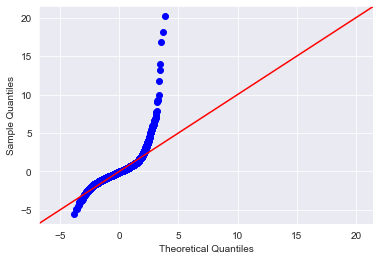

In [18]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Homoscedasticity Assumption

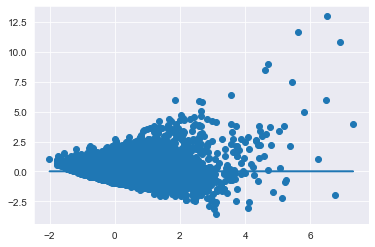

In [19]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [18]:
# I still need to make a few more refinements, especially since I have quite a few outliers to check out

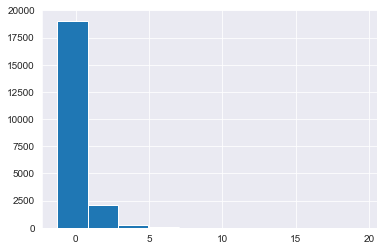

In [20]:
df.price.hist()

In [21]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 0.43608737320882973
0.81 percentile: 0.4837224911242599
0.82 percentile: 0.5163890217866192
0.83 percentile: 0.5706906064041452
0.84 percentile: 0.5980576621482443
0.85 percentile: 0.651962922584714
0.86 percentile: 0.7042050369042507
0.87 percentile: 0.7477571447126439
0.88 percentile: 0.8070968916015777
0.89 percentile: 0.8701712317350851
0.9 percentile: 0.9437416298504134
0.91 percentile: 1.0335528811681653
0.92 percentile: 1.1152280543459618
0.93 percentile: 1.245795912552156
0.94 percentile: 1.4146487955286653
0.95 percentile: 1.6868494693311231
0.96 percentile: 1.9590501431335805
0.97 percentile: 2.312911019076776
0.98 percentile: 2.8845324340619367
0.99 percentile: 3.891674927131031


In [28]:
#subsetting extreme outliers
orig_tot = len(df)
df = df[df.price < 4]
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.price.map(np.log) 
# Applying a log transformation


train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     2377.
Date:                Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:50:37   Log-Likelihood:                -10614.
No. Observations:               15877   AIC:                         2.125e+04
Df Residuals:                   15868   BIC:                         2.132e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0482      0.004    -11.525      0.000      -0.056      -0.040
bathrooms        -0.0452      0.006     -7.102      0.000      -0.058      -0.033
sqft_living       0.2709      0.008     33.232      0.000       0.255       0.287
floors           -0.0106      0.005     -2.339      0.019      -0.020      -0.002
waterfront        0.0387      0.005      7.439      0.000       0.029       0.049
view              0.1051      0.004     23.558      0.000       0.096       0.114
grade             0.2831      0.007     42.496      0.000       0.270       0.296
sqft_living15     0.0570      0.006      8.938      0.000       0.044       0.069
sqft_lot15    -1.026e-06   1.39e-07     -7.368      0.000    -1.3e-06   -7.53e-07
==============================================================================
Omnibus:                     2386.712   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5292.733
Skew:                           0.888   Prob(JB):                         0.00
Kurtosis:                       5.201   Cond. No.                     7.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

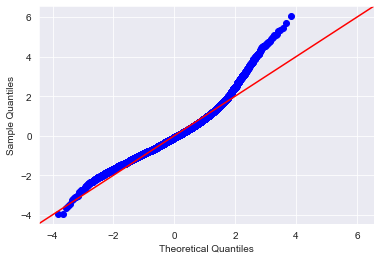

In [29]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
# Definitely much smoother than what I had previously
# Still needs work but getting closer

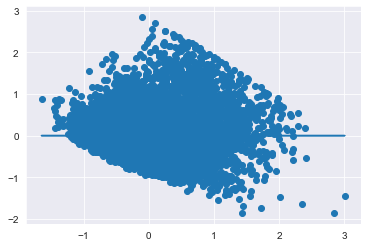

In [30]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 0.3857302485553751
0.81 percentile: 0.42928235636376844
0.82 percentile: 0.4619464372200634
0.83 percentile: 0.5023423782157173
0.84 percentile: 0.5381081857499898
0.85 percentile: 0.5708267067410464
0.86 percentile: 0.6172423656378416
0.87 percentile: 0.6579309223578329
0.88 percentile: 0.7069270436422752
0.89 percentile: 0.7613671784027668
0.9 percentile: 0.8171683165322706
0.91 percentile: 0.8838574816138728
0.92 percentile: 0.9646684176523457
0.93 percentile: 1.0449186203027923
0.94 percentile: 1.142118758910907
0.95 percentile: 1.2513283912471906
0.96 percentile: 1.4690889302891568
0.97 percentile: 1.7140695367113687
0.98 percentile: 1.9862702105138266
0.99 percentile: 2.340131086457021


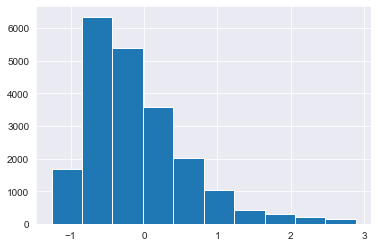

In [31]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [32]:
df = df[df.list_price <= 2.2]
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     416.6
Date:                Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:51:09   Log-Likelihood:                -3985.5
No. Observations:                5617   AIC:                             7989.
Df Residuals:                    5608   BIC:                             8049.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4043      0.008     48.047      0.000       0.388       0.421
bathrooms         0.0044      0.010      0.426      0.670      -0.016       0.025
sqft_living       0.2090      0.012     16.848      0.000       0.185       0.233
floors           -0.0382      0.008     -4.899      0.000      -0.054      -0.023
waterfront        0.0384      0.006      5.990      0.000       0.026       0.051
view              0.0822      0.005     15.203      0.000       0.072       0.093
grade             0.2141      0.011     19.993      0.000       0.193       0.235
sqft_living15    -0.0053      0.009     -0.595      0.552      -0.023       0.012
sqft_lot15    -1.404e-06   1.96e-07     -7.169      0.000   -1.79e-06   -1.02e-06
==============================================================================
Omnibus:                     1015.995   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2019.484
Skew:                           1.090   Prob(JB):                         0.00
Kurtosis:                       4.968   Cond. No.                     8.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

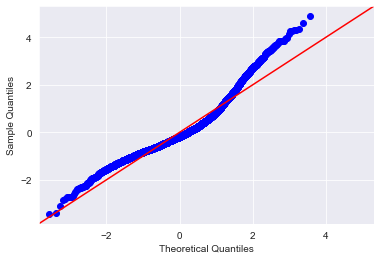

In [33]:

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

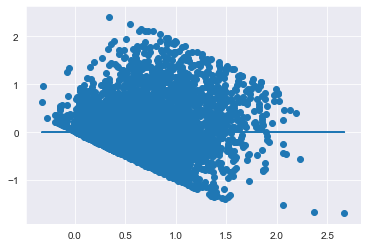

In [34]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

King County DataSet - Regression Analysis and Diagnostics for Price~price
-------------------------------------------------------------------------------------


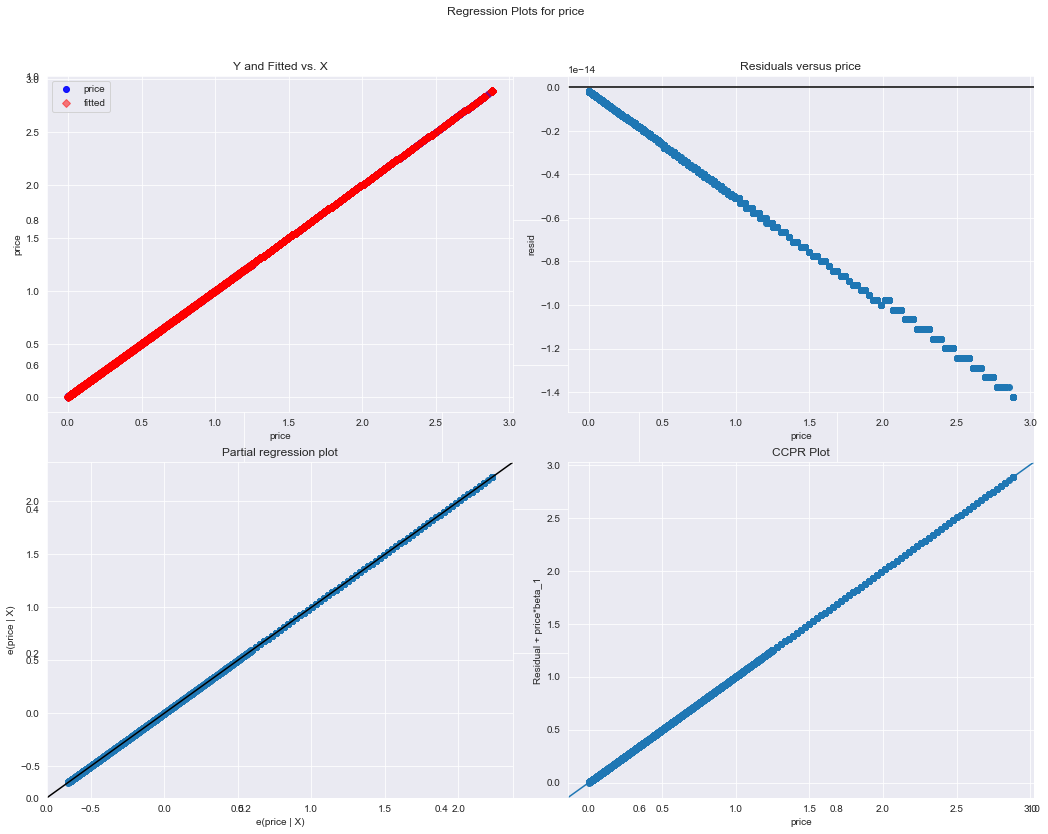

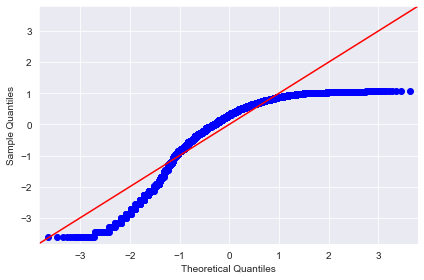

Press Enter to continue...
King County DataSet - Regression Analysis and Diagnostics for Price~bedrooms
-------------------------------------------------------------------------------------


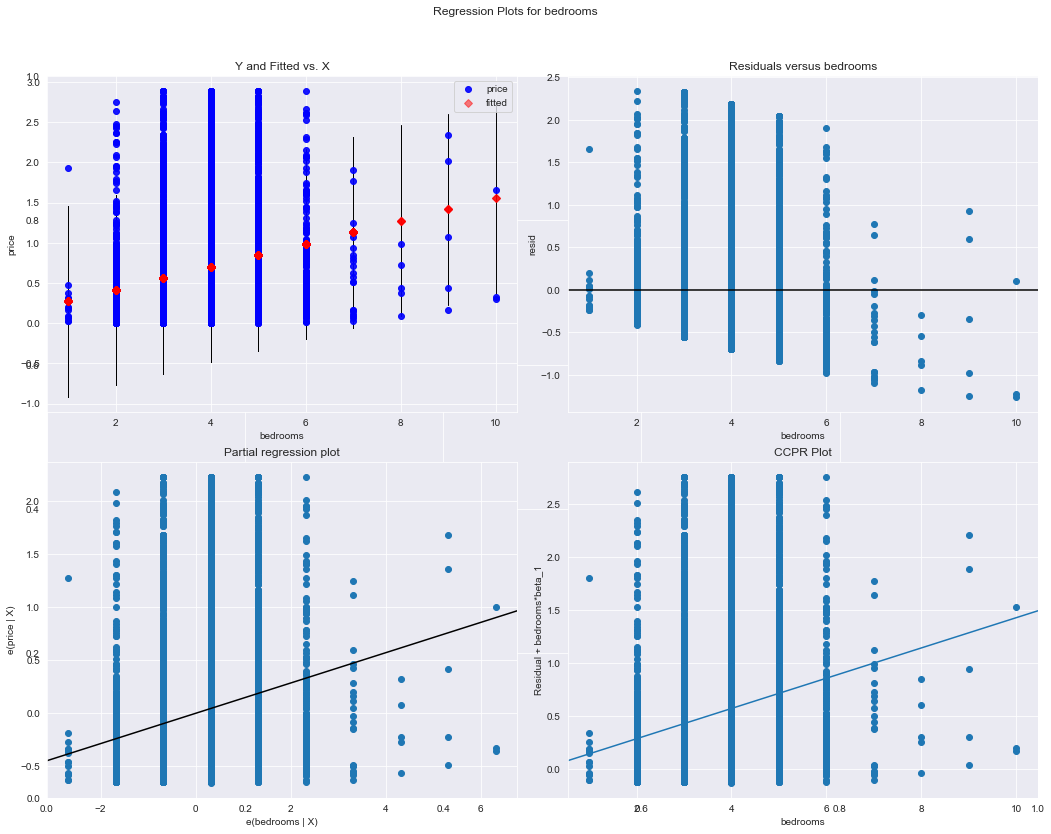

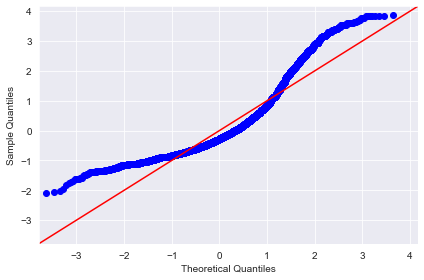

Press Enter to continue...
King County DataSet - Regression Analysis and Diagnostics for Price~bathrooms
-------------------------------------------------------------------------------------


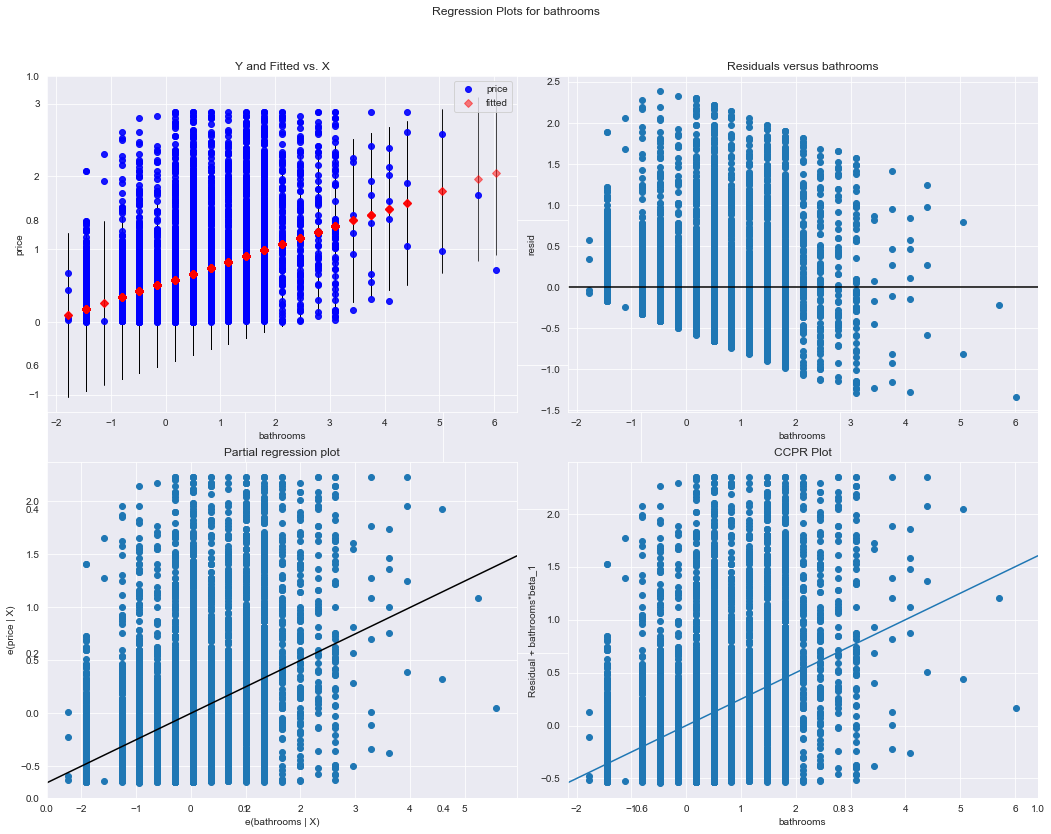

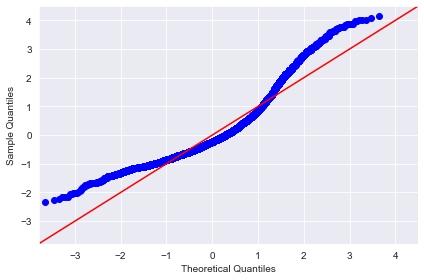

Press Enter to continue...
King County DataSet - Regression Analysis and Diagnostics for Price~sqft_living
-------------------------------------------------------------------------------------


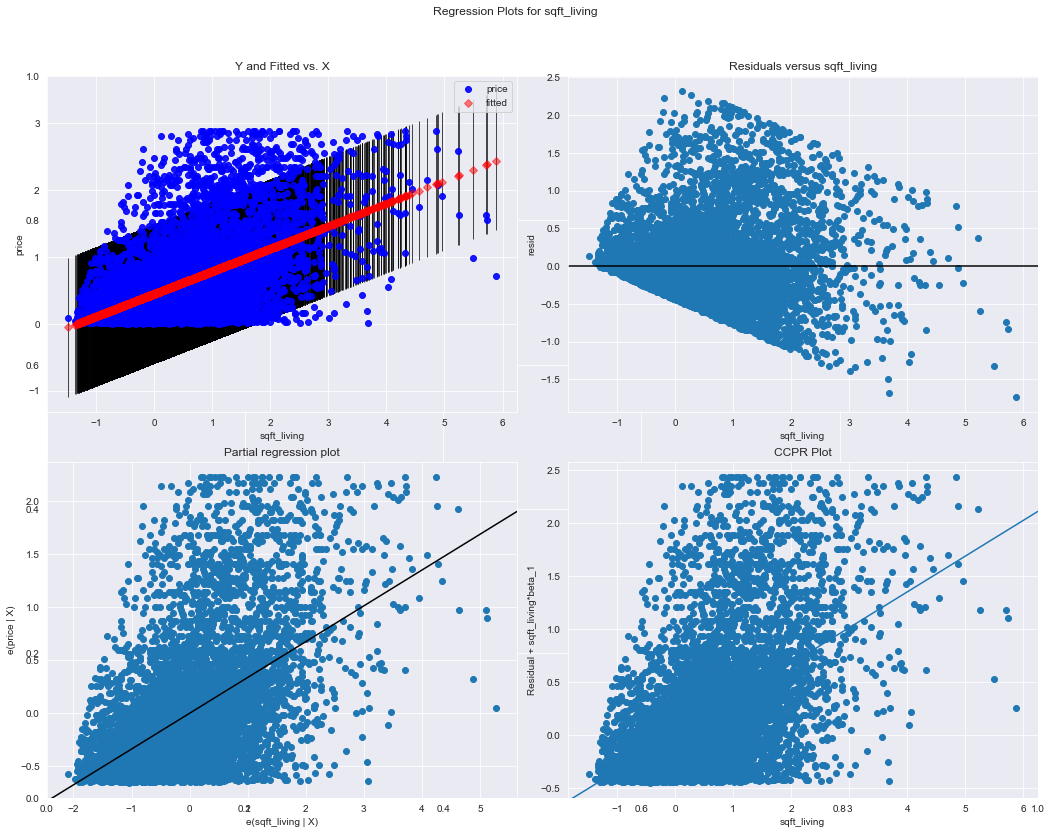

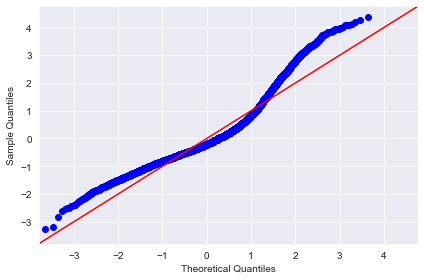

Press Enter to continue...
King County DataSet - Regression Analysis and Diagnostics for Price~sqft_lot
-------------------------------------------------------------------------------------


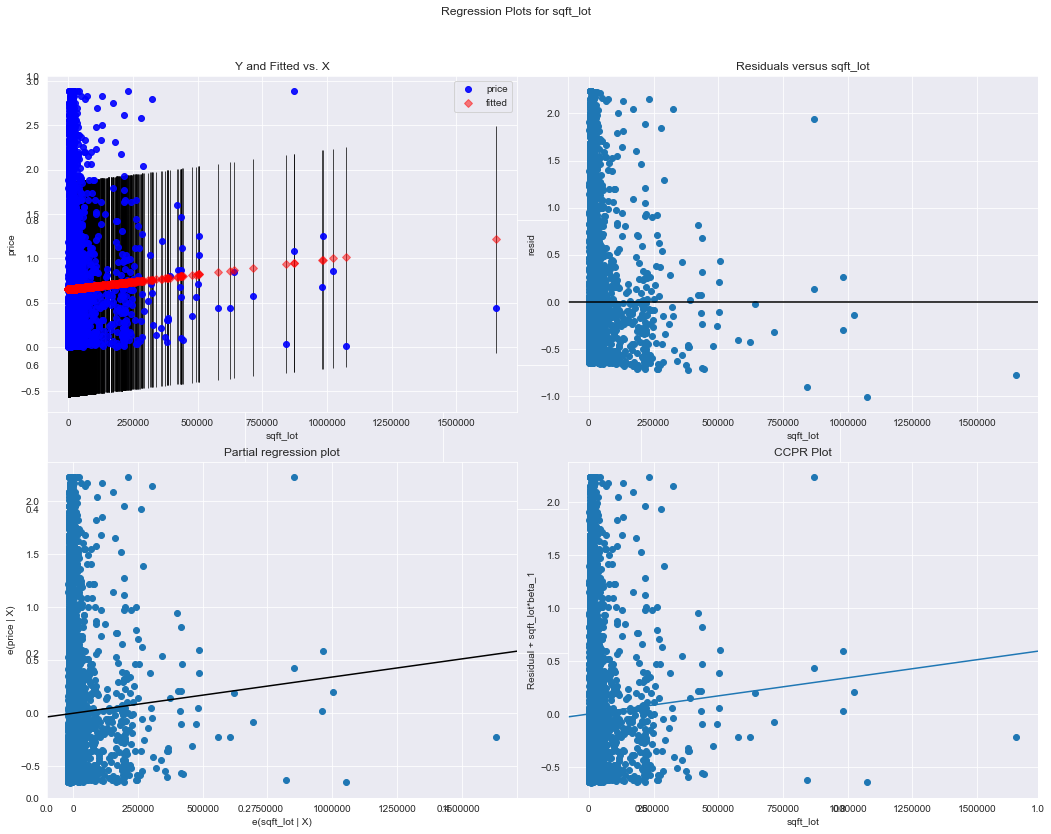

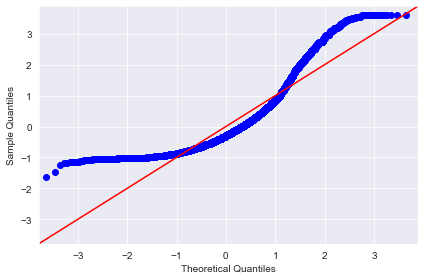

In [ ]:
results = []
for idx, column in enumerate(df.columns):
    print (f"King County DataSet - Regression Analysis and Diagnostics for Price~{column}")
    print ("-------------------------------------------------------------------------------------")

    f = f'price~{column}'
    model = smf.ols(formula=f, data=df).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
    input("Press Enter to continue...")

In [ ]:
pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ])